AGNdata.shape:  (999, 5)
AGNLogSJy.shape:  (999,)
AGNOverall.shape:  (999,)


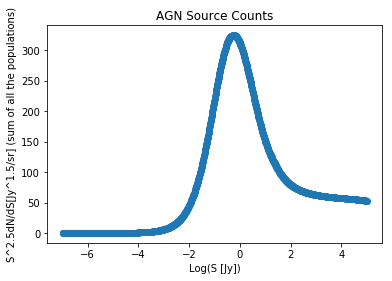

dNdS_AGN.shape:  (999,)


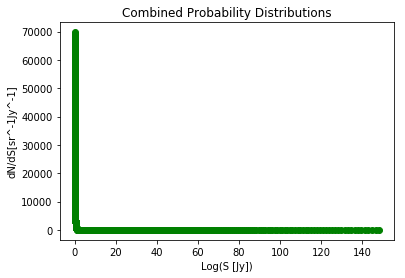

In [34]:
# All table data taken from: http://w1.ira.inaf.it/rstools/srccnt/srccnt_tables.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate

# First, we read in AGN data

####################
# Euclidean normalized differential source counts from the model in Bonato et al. (2017).
# col. 1 =      log(S [Jy])
# col. 2 =      S^2.5dN/dS[Jy^1.5/sr] (sum of all the populations)
# col. 3 =      source counts for FSRQs
# col. 4 =      source counts for BLLacs
# col. 5 =      source counts for steep-spectrum objects  
##################

AGNdf = pd.read_excel('./AGN2017.xlsx', sheet_name='Sheet1')
AGNdata = np.array(AGNdf)
AGNLogSJy = AGNdata[:,0]
AGNOverall = AGNdata[:,1]

# Check data shapes
print('AGNdata.shape: ', AGNdata.shape)
print('AGNLogSJy.shape: ', AGNLogSJy.shape)
print('AGNOverall.shape: ', AGNOverall.shape)

# Check the distribution
plt.scatter(AGNLogSJy, AGNOverall)
plt.xlabel('Log(S [Jy])')
plt.ylabel('S^2.5dN/dS[Jy^1.5/sr] (sum of all the populations)')
plt.title('AGN Source Counts')
plt.show()

# Get into dNdS vs SJy
AGNSJy = np.exp(AGNLogSJy)
AGNSJyTwopointFive = AGNSJy**2.5
dNdS_AGN = AGNOverall / AGNSJyTwopointFive

print('dNdS_AGN.shape: ', dNdS_AGN.shape)

plt.scatter(AGNSJy, dNdS_AGN, color='g')
plt.title('Combined Probability Distributions')
plt.xlabel('Log(S [Jy])')
plt.ylabel('dN/dS[sr^-1Jy^-1]')
plt.show()

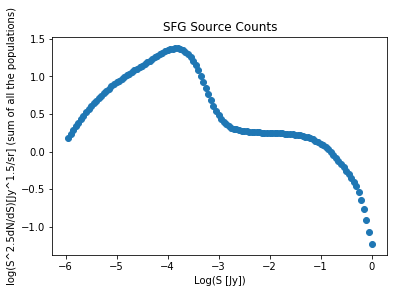

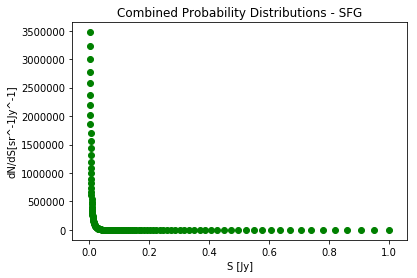

I really don't see how this is so high. But the plot below this look same as in de Zotti / Massardi papers.


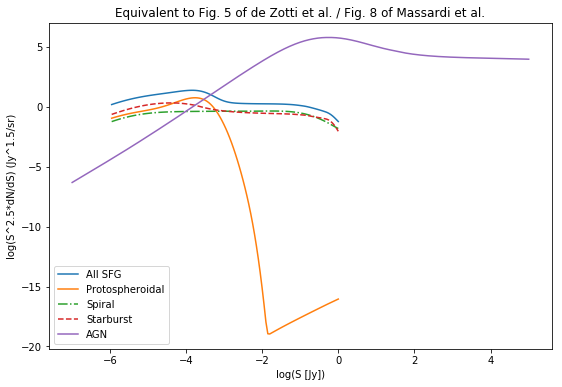

This seems to all be correct.
I can't see close enough into the smaller de Zotti Fig 5, but there's no noticable deviations from it.
Fig 8 of Massardi et al. is more zoomed in, and looks not exact but very similar. That is older data, so we expect a close but not exact match.


In [35]:
# Now, we must read in Star Forming Galaxies (Starbursts, spirals, and protospheroidals)
####################
# 
# NORMALIZED DIFFERENTIAL SOURCE COUNTS OF SPIRALS & STARBURSTS @ 0.61, 1.4, 5.0, 8.4 GHz
# 
# COLUMN 1 : log[S (Jy)]
# COLUMN 2 : log[dN/dS*S^2.5 (Jy^1.5/sr)] for SPIRALS      @ 0.61 GHz
# COLUMN 3 : log[dN/dS*S^2.5 (Jy^1.5/sr)] for STARBURSTS   @ 0.61 GHz
# COLUMN 4 : log[dN/dS*S^2.5 (Jy^1.5/sr)] for SPIRALS      @ 1.4 GHz
# COLUMN 5 : log[dN/dS*S^2.5 (Jy^1.5/sr)] for STARBURSTS   @ 1.4 GHz
# COLUMN 6 : log[dN/dS*S^2.5 (Jy^1.5/sr)] for SPIRALS      @ 5.0 GHz
# COLUMN 7 : log[dN/dS*S^2.5 (Jy^1.5/sr)] for STARBURSTS   @ 5.0 GHz
# COLUMN 8 : log[dN/dS*S^2.5 (Jy^1.5/sr)] for SPIRALS      @ 8.4 GHz
# COLUMN 9 : log[dN/dS*S^2.5 (Jy^1.5/sr)] for STARBURSTS   @ 8.4 GHz
# 
##################
StarburstSpiraldf = pd.read_excel('./SpiralsStarburst.xlsx', sheet_name='Sheet1')
StarburstSpiraldata = np.array(StarburstSpiraldf)
StarburstSpiralLogSJy = StarburstSpiraldata[:,0]

SpiralLogOverall = StarburstSpiraldata[:,3] # log(dN/dS*S^2.5)
StarburstLogOverall = StarburstSpiraldata[:,4] # log(dN/dS*S^2.5)
SpiralOverall = np.exp(SpiralLogOverall) # dN/dS*S^2.5
StarburstOverall = np.exp(StarburstLogOverall) # dN/dS*S^2.5


#Now I must add Protospheroidals to the above

# % 
# % NORMALIZED DIFFERENTIAL COUNTS FOR PROTOSPHEROIDS
# % log[S (Jy)]  -   log[dN/dS*S^2.5 (Jy^1.5/sr)], @ 0.61GHz, 1.4GHz, 5.0GHz, 8.4GHz
# % 
Protospheroidaldf = pd.read_excel('./Protospheroidals2.xlsx', sheet_name='Sheet1')
Protospheroidaldata = np.array(Protospheroidaldf)
ProtospheroidalLogSJy = Protospheroidaldata[:,0]
ProtospheroidalLogOverall = Protospheroidaldata[:,1] # log(dN/dS*S^2.5)
ProtospheroidalOverall = np.exp(ProtospheroidalLogOverall) # dN/dS*S^2.5


#Protospheroidal and Starburst+Spirals all have the same x-axis, so we can combine easily into SFG Total'
SFGLogSJy = ProtospheroidalLogSJy
SFGSJy = np.exp(SFGLogSJy)

# Divide by S^2.5 to obtain dN/dS
SFGSJyTwopointFive = SFGSJy**2.5
dNdS_Protospheroidal = ProtospheroidalOverall / SFGSJyTwopointFive
dNdS_Spiral = SpiralOverall / SFGSJyTwopointFive
dNdS_Starburst = StarburstOverall / SFGSJyTwopointFive

# Combine dN/dS for Spiral, Starburst, SFG, to find dN/dS for all star forming galaxies. 
dNdS_SFG = dNdS_Spiral +  dNdS_Starburst + dNdS_Protospheroidal


# Check the distribution
plt.scatter(SFGLogSJy, np.log((SFGSJy**2.5)*dNdS_SFG))
plt.xlabel('Log(S [Jy])')
plt.ylabel('log(S^2.5dN/dS)[Jy^1.5/sr] (sum of all the populations)')
plt.title('SFG Source Counts')
plt.show()

plt.scatter(SFGSJy, dNdS_SFG, color='g')
plt.title('Combined Probability Distributions - SFG')
plt.xlabel('S [Jy]')
plt.ylabel('dN/dS[sr^-1Jy^-1]')
plt.show()

print("I really don't see how this is so high. But the plot below this look same as in de Zotti / Massardi papers.")

plt.figure(figsize=(9,6))
plt.plot(SFGLogSJy, np.log(SFGSJyTwopointFive*dNdS_SFG), label='All SFG')
plt.plot(SFGLogSJy, np.log(SFGSJyTwopointFive*dNdS_Protospheroidal), ls='-', label='Protospheroidal')
plt.plot(SFGLogSJy, np.log(SFGSJyTwopointFive*dNdS_Spiral), ls='-.', label='Spiral')
plt.plot(SFGLogSJy, np.log(SFGSJyTwopointFive*dNdS_Starburst), ls='--', label='Starburst')
plt.plot(AGNLogSJy, np.log(AGNSJyTwopointFive*dNdS_AGN), label='AGN')
#plt.loglog()
#plt.xlim(-5,-2.5)
#plt.ylim(-1,1.5)
plt.xlabel('log(S [Jy])')
plt.ylabel('log(S^2.5*dN/dS) (Jy^1.5/sr)')
plt.title("Equivalent to Fig. 5 of de Zotti et al. / Fig. 8 of Massardi et al.")
plt.legend()
plt.show()


print("This seems to all be correct.")
print("I can't see close enough into the smaller de Zotti Fig 5, but there's no noticable deviations from it.")
print("Fig 8 of Massardi et al. is more zoomed in, and looks not exact but very similar. That is older data, so we expect a close but not exact match.")

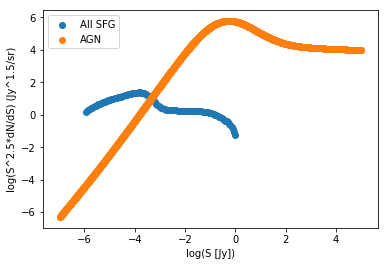

SFGLogSJy.shape:  (120,)
AGNLogSJy.shape:  (999,)


In [36]:
plt.scatter(SFGLogSJy, np.log(SFGSJyTwopointFive*dNdS_SFG), label='All SFG')
plt.scatter(AGNLogSJy, np.log(AGNSJyTwopointFive*dNdS_AGN), label='AGN')
#plt.loglog()
#plt.xlim(-5,-2.5)
#plt.ylim(-1,1.5)
plt.xlabel('log(S [Jy])')
plt.ylabel('log(S^2.5*dN/dS) (Jy^1.5/sr)')
plt.legend()
plt.show()

print('SFGLogSJy.shape: ', SFGLogSJy.shape)
print('AGNLogSJy.shape: ', AGNLogSJy.shape)


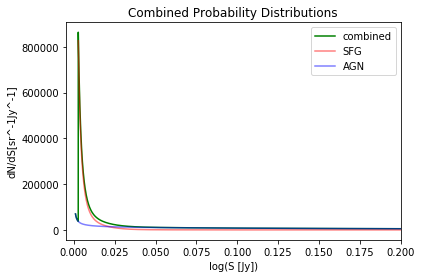

Anna says I should expect to see a \ shape in this loglog plot. Plot to confirm.


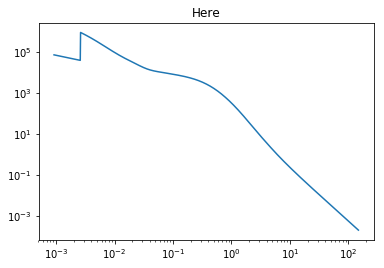

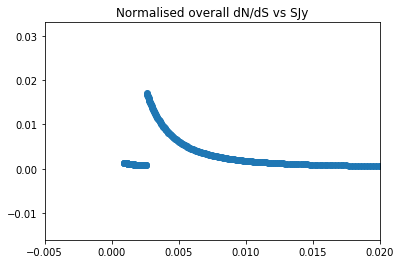

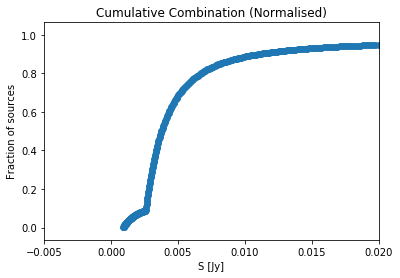

In [32]:
# We will have to combine these two probability density functions into one combined one. 
# Interpolate the smaller (SFG+Spiral) range onto the same x-axis as part of the AGN range, 
# and add the values in this range together.

# Firstly, we find the number of channels needed for a new SFGlogSJy
# This new SFGLogSJy will cover the same range
# But will instead be separated by the same amount as the AGNLogSJy is (i.e. diffAGN)
diffSFG = np.mean(np.diff(SFGLogSJy)) # = 0.05
diffAGN = np.mean(np.diff(AGNLogSJy)) # = 0.01201201201 (in uniform steps throughout in both cases, so np.mean(np.diff) is unnecessary realy)

NewNoChannels = len(np.arange(min(SFGLogSJy), max(SFGLogSJy), diffAGN))
# Poorly explained but hopefully understandable comment incoming:
# when translating into a new bin width, we must lower the values of the probability distribution by an amount related to the difference in each bin widths
# E.g. translating (1) from a range (25-30cm) into bins of (25-26-27-28-29-30cm)
# One would have to do 1*(0.2) = 0.2 to get (0.2, 0.2, 0.2, 0.2, 0.2)
# I think the above comments describe what I mean adaquetely, but they could be worded more concisely... 
dNdS_SFG_adj = dNdS_SFG * (diffAGN/diffSFG)


# Now, let's make the new x-axis for our SFG count,
NewSFGLogSJy = np.linspace(min(SFGLogSJy), max(SFGLogSJy),NewNoChannels)

# Interpolate the source count probability distribution to this new axis
f = interpolate.interp1d(SFGLogSJy, dNdS_SFG_adj) # function = interp1d(x, y)
dNdS_SFG_Interpolated1 = f(NewSFGLogSJy) # ynew = function(xnew)

# Trim SFGLogSJy to be within the range usable for interpolation 
AnotherSFGLogSJy = AGNLogSJy[87:86+NewNoChannels] # Make a new xnew
dNdS_SFG_Interpolated = f(AnotherSFGLogSJy) # Interpolation: ynew = function(xnew)


dNdS_Overall = np.zeros((np.size(dNdS_AGN)))
# Add dN/dS_AGN and dN/dS_SFG to dNdS_Overall. 
dNdS_Overall += dNdS_AGN
dNdS_Overall[87:86+NewNoChannels] += dNdS_SFG_Interpolated # The unusual range [87:] is because this is the index of AGNlogSJy at which it reaches the lower end of SFGlogSJy


LogSJy = AGNLogSJy # Since the AGN LogSJy is the combined LogSJy now.
SJy = np.exp(LogSJy)
AnotherSFGSJy = np.exp(AnotherSFGLogSJy)


plt.plot(SJy, dNdS_Overall, color='g', label='combined')
plt.plot(AnotherSFGSJy, dNdS_SFG_Interpolated, color='r', alpha=0.5, label='SFG')
plt.plot(SJy, dNdS_AGN, color='b', alpha=0.5, label='AGN')
plt.title('Combined Probability Distributions')
plt.xlabel('log(S [Jy])')
plt.ylabel('dN/dS[sr^-1Jy^-1]')
plt.xlim(-0.005,0.2)
plt.legend()
plt.show()


print("Anna says I should expect to see a \ shape in this loglog plot. Plot to confirm.")
plt.plot(SJy, dNdS_Overall)
plt.title('Here')
plt.loglog()
plt.show() 


Norm_AGN_dNdS = dNdS_AGN / sum(dNdS_Overall)
Norm_Overall_dNdS = dNdS_Overall / sum(dNdS_Overall)
plt.scatter(SJy, Norm_Overall_dNdS)
plt.title('Normalised overall dN/dS vs SJy')
plt.xlim(-0.005,0.02)
plt.show()


# Turn this combined function into a cumulative probability distribution function
cumulative = np.zeros(len(Norm_Overall_dNdS))
for i in range(len(Norm_Overall_dNdS)):
    if i == 0:
        cumulative[i] = Norm_Overall_dNdS[i]
    else:
        cumulative[i] = cumulative[i-1] + Norm_Overall_dNdS[i]
        
# Normalise this cumulative probability distribution function 
cumulative = cumulative / cumulative[-1]

plt.scatter(SJy, cumulative)
plt.title('Cumulative Combination (Normalised)')
plt.xlabel('S [Jy]')
plt.ylabel('Fraction of sources')
plt.xlim(-0.005,0.02)
plt.show()

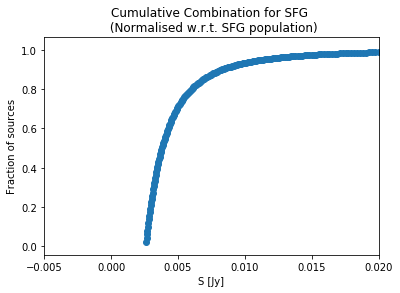

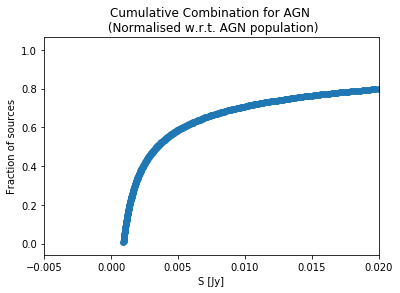

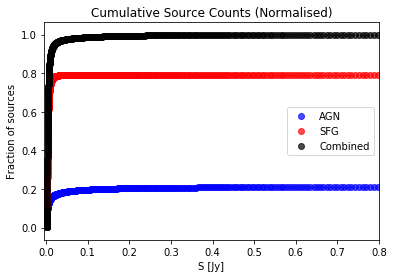

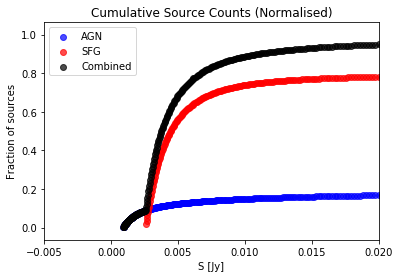

This plot concerns me as I believe there should be more AGN than SFG. Could this be correct?


In [33]:
Norm_SFG_dNdS_Interpolated = dNdS_SFG_Interpolated / sum(dNdS_Overall)

# Turn this combined function into a cumulative probability distribution function
cumulative_SFG = np.zeros(len(Norm_SFG_dNdS_Interpolated))
for i in range(len(Norm_SFG_dNdS_Interpolated)):
    if i == 0:
        cumulative_SFG[i] = Norm_SFG_dNdS_Interpolated[i]
    else:
        cumulative_SFG[i] = cumulative_SFG[i-1] + Norm_SFG_dNdS_Interpolated[i]
        
# Normalise this cumulative probability distribution function 
cumulative_SFG = cumulative_SFG / cumulative[-1] # Normalise w.r.t. total (all) population 
cumulative_SFG2 = cumulative_SFG / cumulative_SFG[-1] # Normalise w.r.t. total SFG population 

plt.scatter(AnotherSFGSJy, cumulative_SFG2)
plt.title('Cumulative Combination for SFG \n (Normalised w.r.t. SFG population)')
plt.xlabel('S [Jy]')
plt.ylabel('Fraction of sources')
plt.xlim(-0.005,0.02)
plt.show()


# Turn this combined function into a cumulative probability distribution function
cumulative_AGN = np.zeros(len(Norm_AGN_dNdS))
for i in range(len(Norm_AGN_dNdS)):
    if i == 0:
        cumulative_AGN[i] = Norm_AGN_dNdS[i]
    else:
        cumulative_AGN[i] = cumulative_AGN[i-1] + Norm_AGN_dNdS[i]
        
# Normalise this cumulative probability distribution function 
cumulative_AGN = cumulative_AGN / cumulative[-1] # Normalise w.r.t. total (all) population 
cumulative_AGN2 = cumulative_AGN / cumulative_AGN[-1] # Normalise w.r.t. total AGN population 

plt.scatter(SJy, cumulative_AGN2)
plt.title('Cumulative Combination for AGN \n (Normalised w.r.t. AGN population)')
plt.xlabel('S [Jy]')
plt.ylabel('Fraction of sources')
plt.xlim(-0.005,0.02)
plt.show()


plt.scatter(SJy, cumulative_AGN, alpha=0.7, color='b', label='AGN')
plt.scatter(AnotherSFGSJy, cumulative_SFG, alpha=0.7, color='r', label='SFG')
plt.scatter(SJy, cumulative, color='k', alpha=0.7, label='Combined')
plt.title('Cumulative Source Counts (Normalised)')
plt.xlabel('S [Jy]')
plt.ylabel('Fraction of sources')
plt.legend()
plt.xlim(-0.005,0.8)
plt.show()


plt.scatter(SJy, cumulative_AGN, alpha=0.7, color='b', label='AGN')
plt.scatter(AnotherSFGSJy, cumulative_SFG, alpha=0.7, color='r', label='SFG')
plt.scatter(SJy, cumulative, color='k', alpha=0.7, label='Combined')
plt.title('Cumulative Source Counts (Normalised)')
plt.xlabel('S [Jy]')
plt.ylabel('Fraction of sources')
plt.legend()
plt.xlim(-0.005,0.02)
plt.show()

print("This plot concerns me as I believe there should be more AGN than SFG. Could this be correct?")